<a href="https://colab.research.google.com/github/LeMat11/ME5920/blob/main/HW1/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 405kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.79MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.50MB/s]


Subset size: 1000
One sample shape: torch.Size([1, 28, 28]) label: 1


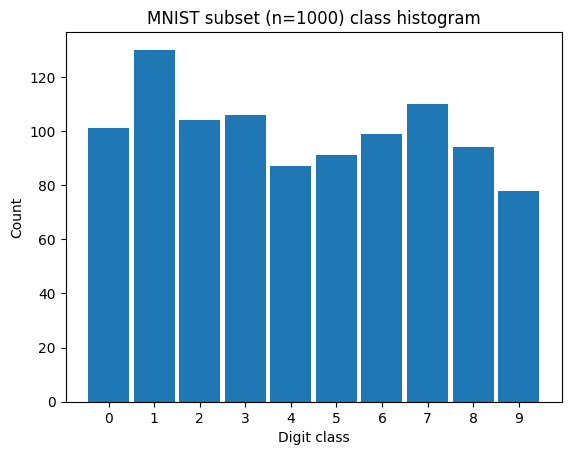

Batched images shape: torch.Size([40, 25, 1, 28, 28])
Batched labels shape: torch.Size([40, 25])


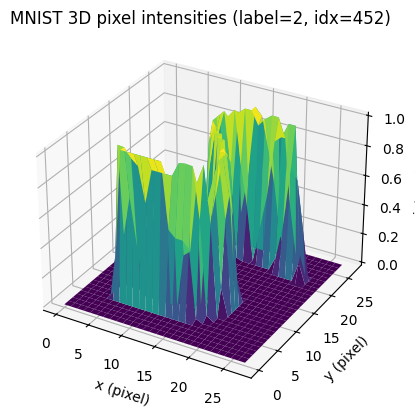

In [1]:
# HW 2 Simple Programming & Exploratory Analytics
# =========================
# HW 2.1 MNIST Images
# =========================

import torch
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from einops import rearrange
import numpy as np

# ----------------------------
# 1) Download MNIST + subset of 1000
# ----------------------------
transform = transforms.ToTensor()  # returns tensor in [0,1], shape [1,28,28]

mnist_train = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# Make a deterministic subset of 1000 samples
torch.manual_seed(11)
indices = torch.randperm(len(mnist_train))[:1000].tolist()
mnist_subset = Subset(mnist_train, indices)

print("Subset size:", len(mnist_subset))
x0, y0 = mnist_subset[0]
print("One sample shape:", x0.shape, "label:", y0)  # should be torch.Size([1,28,28])

# ----------------------------
# 2) Plot histogram of classes in subset
# ----------------------------
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]
plt.figure()
plt.hist(labels, bins=np.arange(11)-0.5, rwidth=0.9)
plt.xticks(range(10))
plt.xlabel("Digit class")
plt.ylabel("Count")
plt.title("MNIST subset (n=1000) class histogram")
plt.show()

# ----------------------------
# 3) Batch images into groups of 25 using einops
#    Required shape: [1000,28,28] -> [num_batches, 25, 1, 28, 28]
# ----------------------------
# Stack subset into a single tensor
images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))])  # [1000,1,28,28]
labels_t = torch.tensor(labels)  # [1000]


images_1000_28_28 = images.squeeze(1)  # [1000,28,28]

# Make sure 1000 is divisible by 25
batch_size = 25
assert images_1000_28_28.shape[0] % batch_size == 0

# Rearrange to [num_batches, batch_size, 1, 28, 28]
batches = rearrange(images_1000_28_28, '(nb bs) h w -> nb bs 1 h w', bs=batch_size)
label_batches = rearrange(labels_t, '(nb bs) -> nb bs', bs=batch_size)

print("Batched images shape:", batches.shape)       # [40,25,1,28,28]
print("Batched labels shape:", label_batches.shape) # [40,25]

# ----------------------------
# 4) Randomly select an image and plot it in 3D
# ----------------------------
import random
from mpl_toolkits.mplot3d import Axes3D

idx = random.randint(0, len(mnist_subset)-1)
img, lab = mnist_subset[idx]  # img: [1,28,28]
img2d = img.squeeze(0).numpy()  # [28,28]

# Create x,y grid
x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)
Z = img2d  # pixel intensity

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel("x (pixel)")
ax.set_ylabel("y (pixel)")
ax.set_zlabel("intensity")
ax.set_title(f"MNIST 3D pixel intensities (label={lab}, idx={idx})")
plt.show()


Cloning into 'ME5920'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 59 (delta 14), reused 23 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 45.67 MiB | 40.39 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/ME5920
total 32K
drwxr-xr-x 4 root root 4.0K Feb 19 05:46 .
drwxr-xr-x 1 root root 4.0K Feb 19 05:46 ..
-rw-r--r-- 1 root root 6.1K Feb 19 05:46 .DS_Store
drwxr-xr-x 8 root root 4.0K Feb 19 05:46 .git
drwxr-xr-x 3 root root 4.0K Feb 19 05:46 HW1
-rw-r--r-- 1 root root 1.1K Feb 19 05:46 LICENSE
-rw-r--r-- 1 root root   21 Feb 19 05:46 README.md
Data time range: 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Sampling interval (first two rows): 0 days 00:10:00
                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19

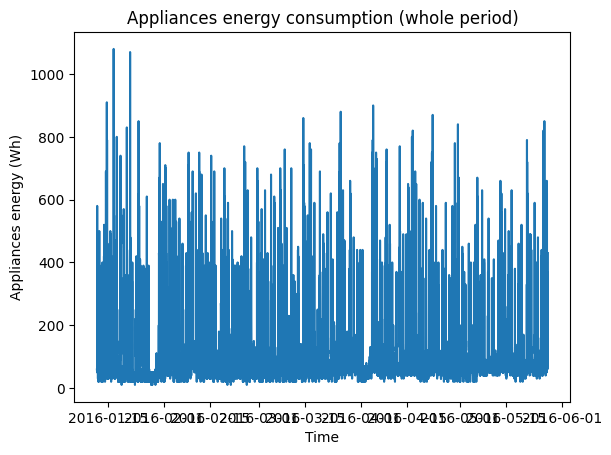

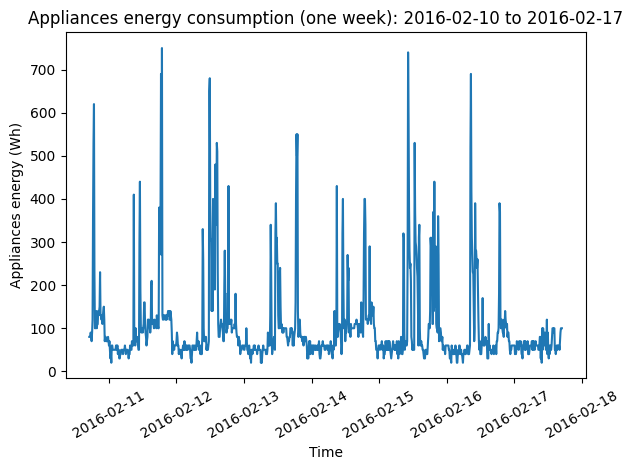

/tmp/ipython-input-3885360722.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energy_week_hourly = energy_week.resample("1H").mean()


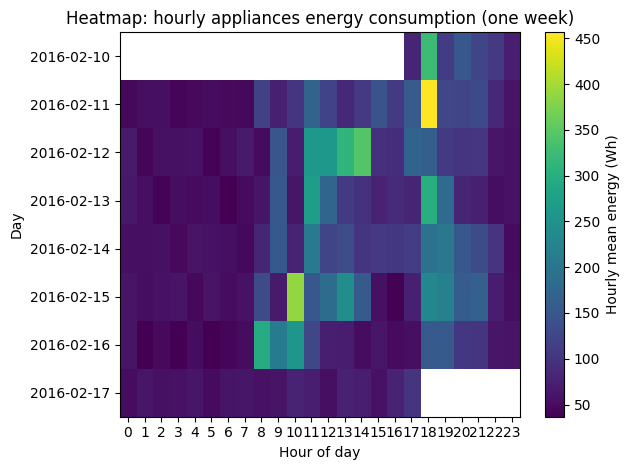

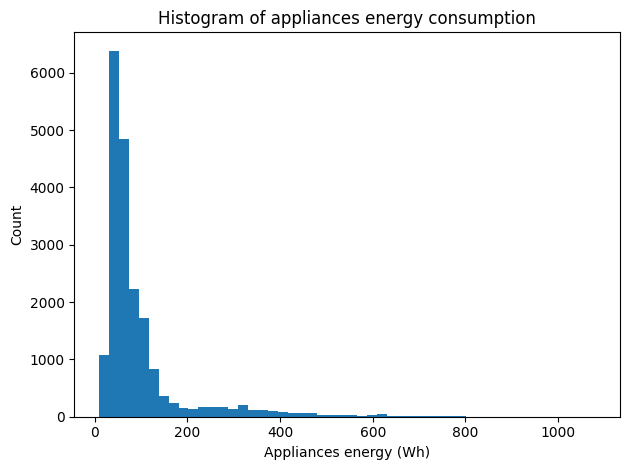

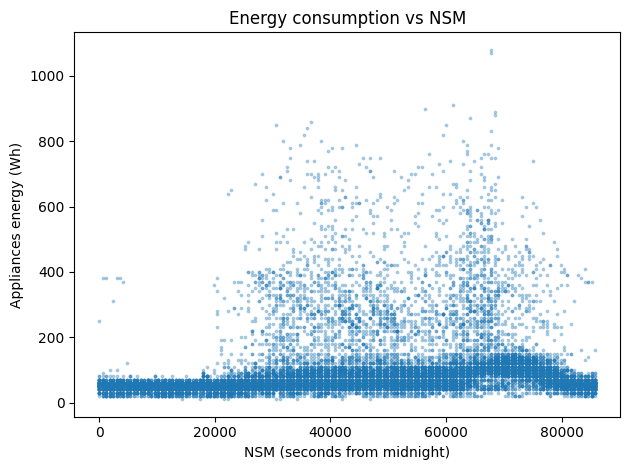

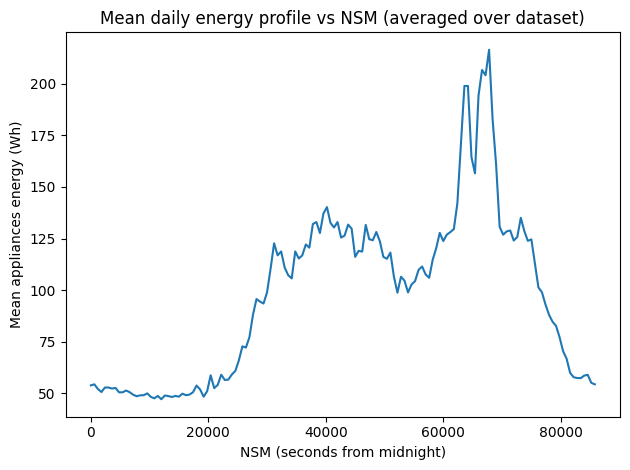

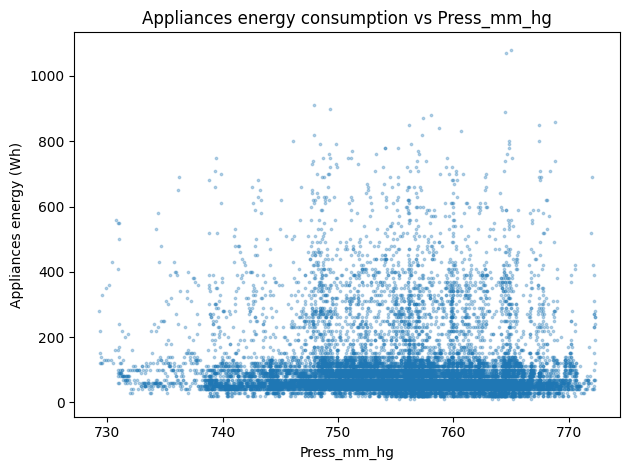

Correlation(Appliances, NSM): 0.21715217211236712
Correlation(Appliances, Press_mm_hg): -0.03488482908163533


In [2]:
# =========================
# HW1 2.2 Time Series
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------- Load data -------------
!rm -rf ME5920
!git clone https://github.com/LeMat11/ME5920.git
%cd ME5920
!ls -lah
csv_path = "HW1/energydata_complete.csv"
df = pd.read_csv(csv_path)

# Convert to datetime and set as index for easy slicing
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").set_index("date")

# Appliances energy consumption column is typically named "Appliances"
energy = df["Appliances"]

print("Data time range:", df.index.min(), "to", df.index.max())
print("Sampling interval (first two rows):", df.index[1] - df.index[0])
print(df.head())

# ============= 1) Plot whole period + one week zoom =============
plt.figure()
plt.plot(energy.index, energy.values)
plt.xlabel("Time")
plt.ylabel("Appliances energy (Wh)")
plt.title("Appliances energy consumption (whole period)")
plt.show()

# Pick any one week to zoom
# Here we auto-pick a week starting 30 days after the beginning to avoid edge effects
start_week = df.index.min() + pd.Timedelta(days=30)
end_week = start_week + pd.Timedelta(days=7)
energy_week = energy.loc[start_week:end_week]

plt.figure()
plt.plot(energy_week.index, energy_week.values)
plt.xlabel("Time")
plt.ylabel("Appliances energy (Wh)")
plt.title(f"Appliances energy consumption (one week): {start_week.date()} to {end_week.date()}")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# ============= 2) Heatmap of hourly consumption for a week =============
# Build an hourly time series for that week
# (mean over each hour)
energy_week_hourly = energy_week.resample("1H").mean()

# Create a day x hour matrix: 7 days (rows) x 24 hours (cols)
# Use day labels and hour columns
# We map each timestamp to day index (0..6) and hour (0..23)
tmp = energy_week_hourly.to_frame("Appliances")
tmp["day"] = tmp.index.date
tmp["hour"] = tmp.index.hour

# Pivot to matrix (days x hours)
heat = tmp.pivot_table(index="day", columns="hour", values="Appliances", aggfunc="mean")

# Ensure hours 0..23 exist as columns (fill missing with NaN)
heat = heat.reindex(columns=range(24))

plt.figure()
plt.imshow(heat.values, aspect="auto")
plt.colorbar(label="Hourly mean energy (Wh)")
plt.xticks(ticks=np.arange(24), labels=np.arange(24))
plt.yticks(ticks=np.arange(len(heat.index)), labels=[str(d) for d in heat.index])
plt.xlabel("Hour of day")
plt.ylabel("Day")
plt.title("Heatmap: hourly appliances energy consumption (one week)")
plt.tight_layout()
plt.show()

# ============= 3) Histogram of energy consumption =============
plt.figure()
plt.hist(energy.values, bins=50)
plt.xlabel("Appliances energy (Wh)")
plt.ylabel("Count")
plt.title("Histogram of appliances energy consumption")
plt.tight_layout()
plt.show()

# ============= 4) NSM feature + plot energy vs NSM =============
# NSM = number of seconds from midnight
nsm = df.index.hour * 3600 + df.index.minute * 60 + df.index.second
df["NSM"] = nsm

plt.figure()
plt.scatter(df["NSM"], df["Appliances"], s=3, alpha=0.3)
plt.xlabel("NSM (seconds from midnight)")
plt.ylabel("Appliances energy (Wh)")
plt.title("Energy consumption vs NSM")
plt.tight_layout()
plt.show()

df_tmp = df.copy()
df_tmp["NSM_min"] = (df_tmp["NSM"] // 60).astype(int)  # bucket by minute
sm_profile = df_tmp.groupby("NSM_min")["Appliances"].mean()

plt.figure()
plt.plot(sm_profile.index * 60, sm_profile.values)
plt.xlabel("NSM (seconds from midnight)")
plt.ylabel("Mean appliances energy (Wh)")
plt.title("Mean daily energy profile vs NSM (averaged over dataset)")
plt.tight_layout()
plt.show()

# ============= 5) Energy vs Press_mm_hg =============
# Column name in this dataset is typically "Press_mm_hg"
if "Press_mm_hg" not in df.columns:
    raise KeyError("Column 'Press_mm_hg' not found. Please check the CSV column names.")

plt.figure()
plt.scatter(df["Press_mm_hg"], df["Appliances"], s=3, alpha=0.3)
plt.xlabel("Press_mm_hg")
plt.ylabel("Appliances energy (Wh)")
plt.title("Appliances energy consumption vs Press_mm_hg")
plt.tight_layout()
plt.show()

corr_nsm = df["Appliances"].corr(df["NSM"])
corr_press = df["Appliances"].corr(df["Press_mm_hg"])
print("Correlation(Appliances, NSM):", corr_nsm)
print("Correlation(Appliances, Press_mm_hg):", corr_press)


**why NSM and Press_mm_hg are major contributing factors:**

- NSM (seconds from midnight) captures strong daily/diurnal usage patterns. Human activity and appliance usage
  (cooking, lighting, HVAC schedules, occupancy) typically repeat each day, so time-of-day is highly predictive.
- Press_mm_hg is linked to weather systems and seasonal/short-term atmospheric changes. Weather affects indoor
  conditions and HVAC/ventilation/dehumidification needs, which can indirectly drive appliance energy usage.
  Therefore, pressure can act as a proxy for weather-related energy demand variations.

Files found in HW1: ['Agricultural_Image_Analytics', 'energydata_complete.csv', 'airfoil_self_noise.dat', 'hw1.ipynb']
Loading: HW1/airfoil_self_noise.dat
Data shape: (1503, 6)


Frequency  AngleOfAttack  ChordLength  Velocity  SuctionThickness  \
0        800            0.0       0.3048      71.3          0.002663   
1       1000            0.0       0.3048      71.3          0.002663   
2       1250            0.0       0.3048      71.3          0.002663   
3       1600            0.0       0.3048      71.3          0.002663   
4       2000            0.0       0.3048      71.3          0.002663   

   SoundPressureLevel  
0             126.201  
1             125.201  
2             125.951  
3             127.591  
4             127.461


--- Descriptive Statistics ---


Mean      Variance       Median  Kurtosis  \
Frequency           2886.380572  9.938717e+06  1600.000000  5.708685   
AngleOfAttack          6.782302  3.502424e+01     5.400000 -0.412951   
ChordLength            0.136548  8.749868e-03     0.101600 -1.037964   
Velocity              50.860745  2.425116e+02    39.600000 -1.563951   
SuctionThickness       0.011140  1.729287e-04     0.004957  2.218903   
SoundPressureLevel   124.835943  4.759146e+01   125.721000 -0.314187   

                    Skewness         Range  
Frequency           2.137084  19800.000000  
AngleOfAttack       0.689164     22.200000  
ChordLength         0.457457      0.279400  
Velocity            0.235852     39.600000  
SuctionThickness    1.702165      0.058011  
SoundPressureLevel -0.418952     37.607000

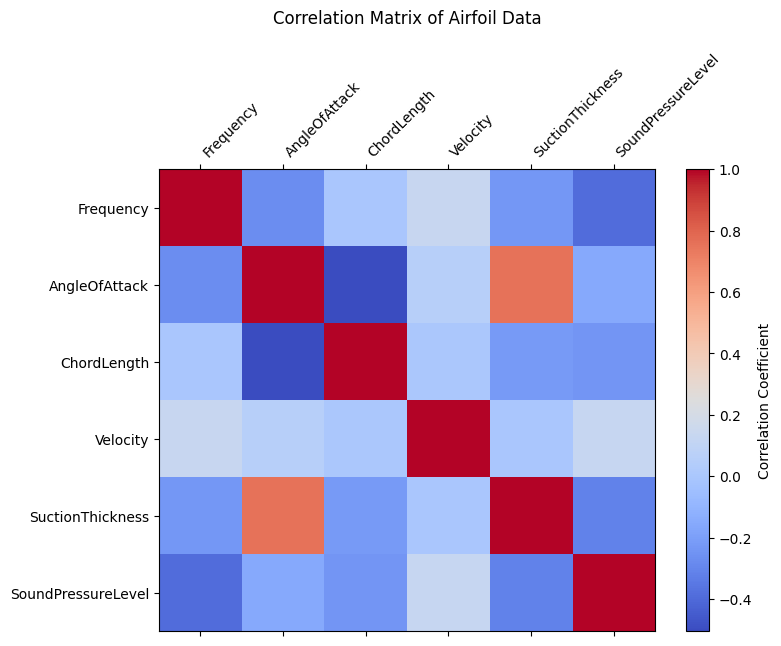

In [3]:
# =========================
# HW1 2.3 Multi-variate
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1) Browse/Find the file
# We look into HW1 for the dataset (if we are already in the repo root)
search_dir = "HW1"

files_in_dir = os.listdir(search_dir)
print("Files found in HW1:", files_in_dir)

# We expect a file like 'airfoil_self_noise.dat'
# Let's try to identify it automatically based on 'airfoil' in the name
possible_files = [f for f in files_in_dir if "airfoil" in f.lower()]
if len(possible_files) > 0:
    target_file = possible_files[0]
else:
    # Fallback if naming is different, but this is the standard name
    target_file = "airfoil_self_noise.dat"

file_path = os.path.join(search_dir, target_file)
print(f"Loading: {file_path}")

# 2) Load data
# The NASA airfoil dataset is typically tab-separated and has no header
try:
    # Try tab separator first
    df_air = pd.read_csv(file_path, sep='\t', header=None)
except:
    # Fallback to whitespace separator
    df_air = pd.read_csv(file_path, sep=r'\s+', header=None)

# Assign columns based on problem description:
# 1. Frequency, in Hz.
# 2. Angle of attack, in degrees.
# 3. Chord length, in meters.
# 4. Free-stream velocity, in meters per second.
# 5. Suction side displacement thickness, in meters.
# Output: Scaled sound pressure level, in decibels.
cols = [
    "Frequency",
    "AngleOfAttack",
    "ChordLength",
    "Velocity",
    "SuctionThickness",
    "SoundPressureLevel"
]

# Validate shape and assign columns
if df_air.shape[1] == len(cols):
    df_air.columns = cols
else:
    print(f"Warning: Data has {df_air.shape[1]} columns, expected {len(cols)}. Check delimiter.")

print("Data shape:", df_air.shape)
display(df_air.head())

# 3) Compute Descriptive Statistics
# Requirements: Mean, Variance, Median, Kurtosis, Skewness, Range
desc_stats = pd.DataFrame(index=df_air.columns)
desc_stats['Mean'] = df_air.mean()
desc_stats['Variance'] = df_air.var()
desc_stats['Median'] = df_air.median()
desc_stats['Kurtosis'] = df_air.kurtosis()
desc_stats['Skewness'] = df_air.skew()
desc_stats['Range'] = df_air.max() - df_air.min()

print("\n--- Descriptive Statistics ---")
display(desc_stats)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(df_air.corr(), cmap='coolwarm', aspect='auto')
fig.colorbar(cax, label="Correlation Coefficient")

# Set ticks and labels
ax.set_xticks(range(len(df_air.columns)))
ax.set_xticklabels(df_air.columns, rotation=45, ha='left')
ax.set_yticks(range(len(df_air.columns)))
ax.set_yticklabels(df_air.columns)

plt.title("Correlation Matrix of Airfoil Data", pad=20)
plt.show()

Saved to: HW1/Agricultural_Image_Analytics/augmented_100


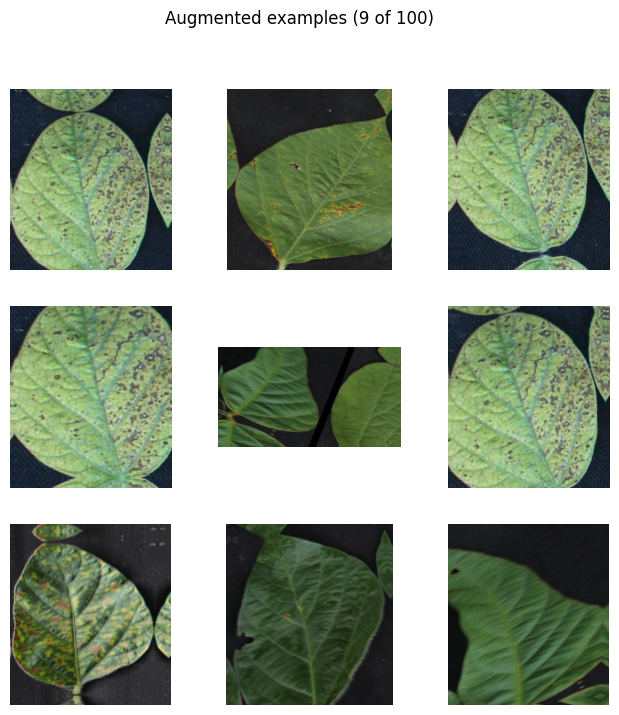

Patches shape: (400, 32, 32, 3)
Whitened patches shape: (400, 32, 32, 3)


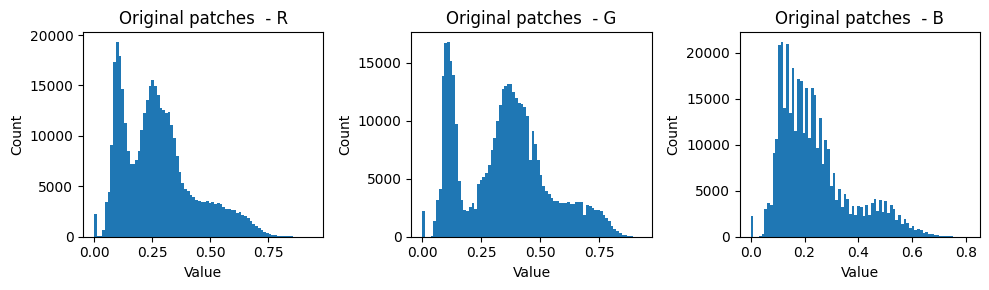

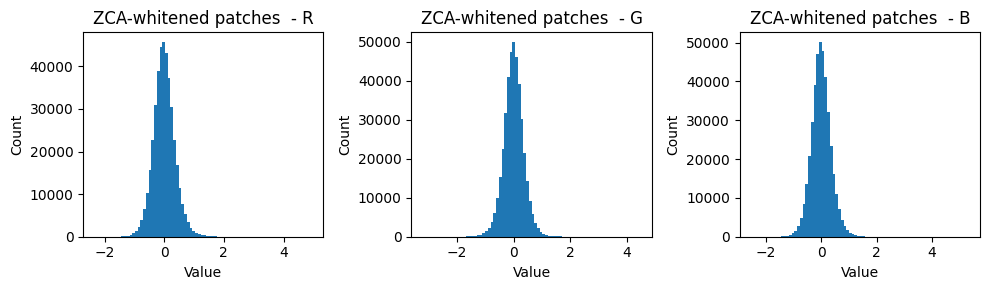

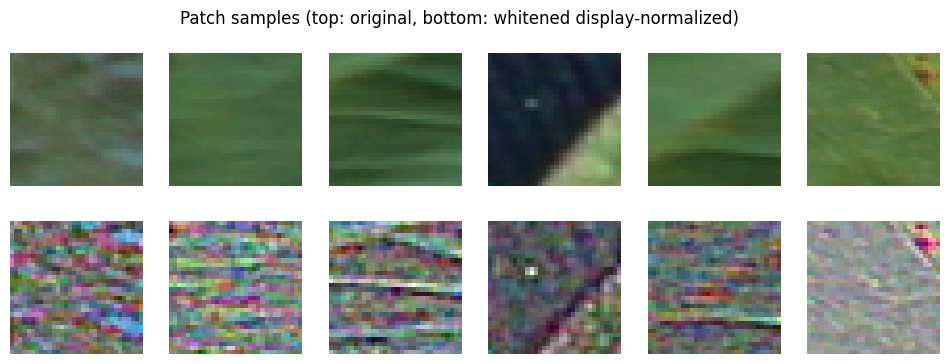

In [9]:
# HW1 3 Image Processing
# =========================
# HW1 3.1 Image preprocessing & transformation
# =========================

import os, glob, random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# -------------------------
# 0) Paths & image listing
# -------------------------
DATA_ROOT = "HW1/Agricultural_Image_Analytics"
LEAF_DIR  = os.path.join(DATA_ROOT, "leaves")

OUT_AUG_DIR = os.path.join(DATA_ROOT, "augmented_100")
os.makedirs(OUT_AUG_DIR, exist_ok=True)

leaf_paths = sorted(glob.glob(os.path.join(LEAF_DIR, "*.*")))
leaf_paths = [p for p in leaf_paths if os.path.splitext(p.lower())[1] in [".png",".jpg",".jpeg"]]
assert len(leaf_paths) > 0, "No leaf images found."

def random_affine_warp(img_bgr):
    h, w = img_bgr.shape[:2]
    angle = random.uniform(-25, 25)
    scale = random.uniform(0.85, 1.15)
    tx    = random.uniform(-0.10*w, 0.10*w)
    ty    = random.uniform(-0.10*h, 0.10*h)

    M = cv2.getRotationMatrix2D((w/2, h/2), angle, scale)
    M[0, 2] += tx
    M[1, 2] += ty

    aff = cv2.warpAffine(img_bgr, M, (w, h),
                         flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_REFLECT_101)

    src = np.float32([[0,0], [w-1,0], [w-1,h-1], [0,h-1]])
    jitter = 0.06
    dst = src.copy()
    dst[:,0] += np.random.uniform(-jitter*w, jitter*w, size=4)
    dst[:,1] += np.random.uniform(-jitter*h, jitter*h, size=4)

    P = cv2.getPerspectiveTransform(src, dst)
    out = cv2.warpPerspective(aff, P, (w, h),
                              flags=cv2.INTER_LINEAR,
                              borderMode=cv2.BORDER_REFLECT_101)
    return out

# generate 100 augmented images from random source leaves
for i in range(100):
    src_path = random.choice(leaf_paths)
    img = cv2.imread(src_path, cv2.IMREAD_COLOR)
    if img is None:
        continue
    aug = random_affine_warp(img)
    cv2.imwrite(os.path.join(OUT_AUG_DIR, f"aug_{i:03d}.png"), aug)

print("Saved to:", OUT_AUG_DIR)

# show a small grid preview
preview_paths = sorted(glob.glob(os.path.join(OUT_AUG_DIR, "aug_*.png")))[:9]
plt.figure(figsize=(8,8))
for i, p in enumerate(preview_paths):
    im = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(im)
    plt.axis("off")
plt.suptitle("Augmented examples (9 of 100)")
plt.show()

# -------------------------
# 2) Extract local patches from ALL leaf images
# -------------------------
PATCH_SIZE = 32
PATCHES_PER_IMAGE = 50  # control total patch count
MAX_IMAGES = None

def read_rgb(path):
    bgr = cv2.imread(path, cv2.IMREAD_COLOR)
    if bgr is None:
        return None
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

def sample_patches(img_rgb, patch_size=32, n_patches=50):
    h, w = img_rgb.shape[:2]
    ps = patch_size
    if h < ps or w < ps:
        return []
    patches = []
    for _ in range(n_patches):
        y = random.randint(0, h-ps)
        x = random.randint(0, w-ps)
        patch = img_rgb[y:y+ps, x:x+ps, :]
        patches.append(patch)
    return patches

# choose a subset of images if needed
paths_use = leaf_paths if MAX_IMAGES is None else leaf_paths[:MAX_IMAGES]

patch_list = []
for p in paths_use:
    im = read_rgb(p)
    if im is None:
        continue
    patch_list.extend(sample_patches(im, PATCH_SIZE, PATCHES_PER_IMAGE))

patches = np.stack(patch_list, axis=0)  # [N, ps, ps, 3]
patches = patches.astype(np.float32) / 255.0
print("Patches shape:", patches.shape)  # [N, 32, 32, 3]

# -------------------------
# 3) ZCA whitening on patches
# -------------------------
def zca_whiten(patches, eps=1e-5):
    """
    patches: [N, H, W, C] float32 in [0,1]
    returns: whitened patches same shape, plus (mean, ZCA_matrix) for reuse
    """
    N, H, W, C = patches.shape
    X = patches.reshape(N, -1)  # [N, D]
    mean = X.mean(axis=0, keepdims=True)
    Xc = X - mean

    # covariance: [D, D]
    # Use smaller trick: SVD on Xc / sqrt(N-1)
    sigma = np.dot(Xc.T, Xc) / (N - 1)

    # SVD
    U, S, _ = np.linalg.svd(sigma, full_matrices=False)
    ZCA = U @ np.diag(1.0 / np.sqrt(S + eps)) @ U.T

    Xw = Xc @ ZCA
    patches_w = Xw.reshape(N, H, W, C)
    return patches_w, mean, ZCA

# Here we whiten all patches;
patches_w, zca_mean, zca_mat = zca_whiten(patches, eps=1e-5)
print("Whitened patches shape:", patches_w.shape)

# -------------------------
# 4) Channel-by-channel distribution of PREWHITENED patches
# 5) Channel-by-channel distribution of ORIGINAL patches
# -------------------------
def plot_channel_hist(patches_arr, title, bins=80):
    # patches_arr: [N,H,W,C]
    C = patches_arr.shape[-1]
    plt.figure(figsize=(10,3))
    for c, name in enumerate(["R","G","B"][:C]):
        vals = patches_arr[..., c].ravel()
        plt.subplot(1, C, c+1)
        plt.hist(vals, bins=bins)
        plt.title(f"{title} - {name}")
        plt.xlabel("Value")
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_channel_hist(patches,   "Original patches ")
plot_channel_hist(patches_w, "ZCA-whitened patches ")

def show_patches(before, after, n=6):
    idx = np.random.choice(before.shape[0], size=n, replace=False)
    plt.figure(figsize=(12,4))
    for i, k in enumerate(idx):
        plt.subplot(2, n, i+1)
        plt.imshow(before[k])
        plt.axis("off")
        if i == 0:
            plt.ylabel("Original")

        # For display only: normalize whitened patch to 0..1
        w = after[k]
        w_disp = (w - w.min()) / (w.max() - w.min() + 1e-9)
        plt.subplot(2, n, n+i+1)
        plt.imshow(w_disp)
        plt.axis("off")
        if i == 0:
            plt.ylabel("Whitened")
    plt.suptitle("Patch samples (top: original, bottom: whitened display-normalized)")
    plt.show()

show_patches(patches, patches_w, n=6)

mean(V)=173.0
big boards: 4 coarse roi: (625, 1236, 3204, 3772)
refined ROI by veg bbox: (625, 1236, 3096, 3772)


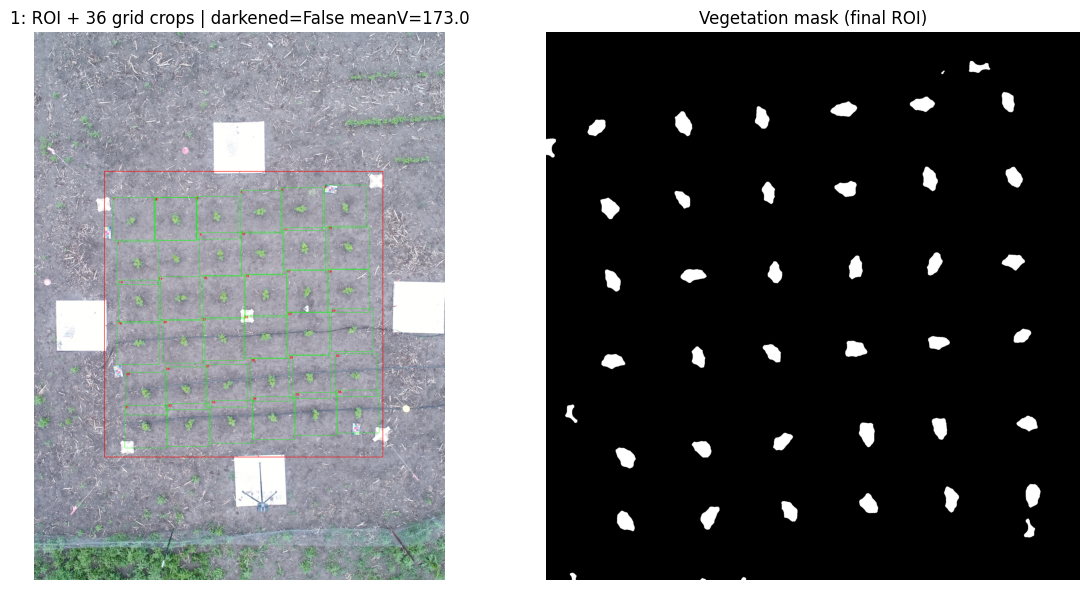

[1] coarseROI=(625, 1236, 3204, 3772) finalROI=(625, 1236, 3096, 3772)  crops -> /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_final_v4/1_crops
mean(V)=205.6
big boards: 4 coarse roi: (570, 808, 3256, 3468)
refined ROI by veg bbox: (570, 808, 3256, 3468)


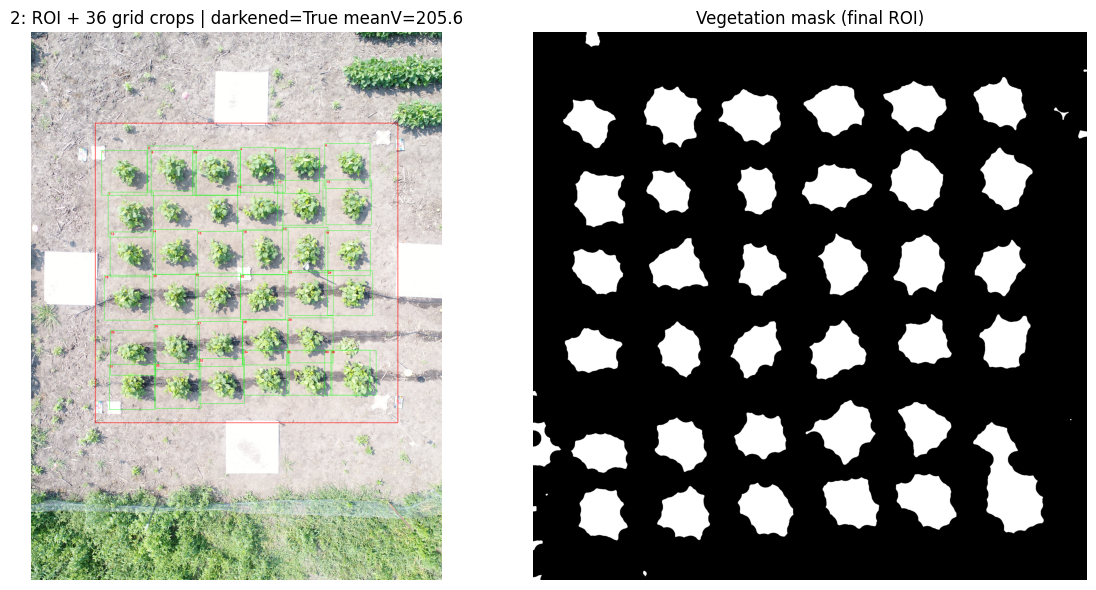

[2] coarseROI=(570, 808, 3256, 3468) finalROI=(570, 808, 3256, 3468)  crops -> /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_final_v4/2_crops
mean(V)=116.6
big boards: 4 coarse roi: (158, 979, 3135, 3921)
refined ROI by veg bbox: (158, 979, 3135, 3921)


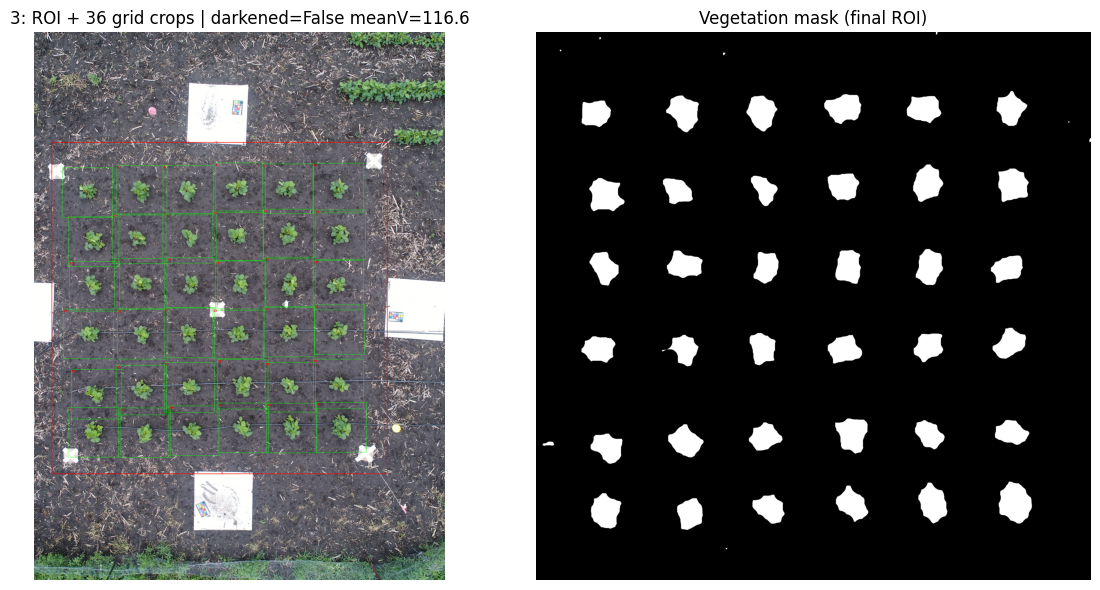

[3] coarseROI=(158, 979, 3135, 3921) finalROI=(158, 979, 3135, 3921)  crops -> /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_final_v4/3_crops
mean(V)=175.9
big boards: 4 coarse roi: (488, 1212, 3402, 4092)
refined ROI by veg bbox: (488, 1212, 3402, 4092)


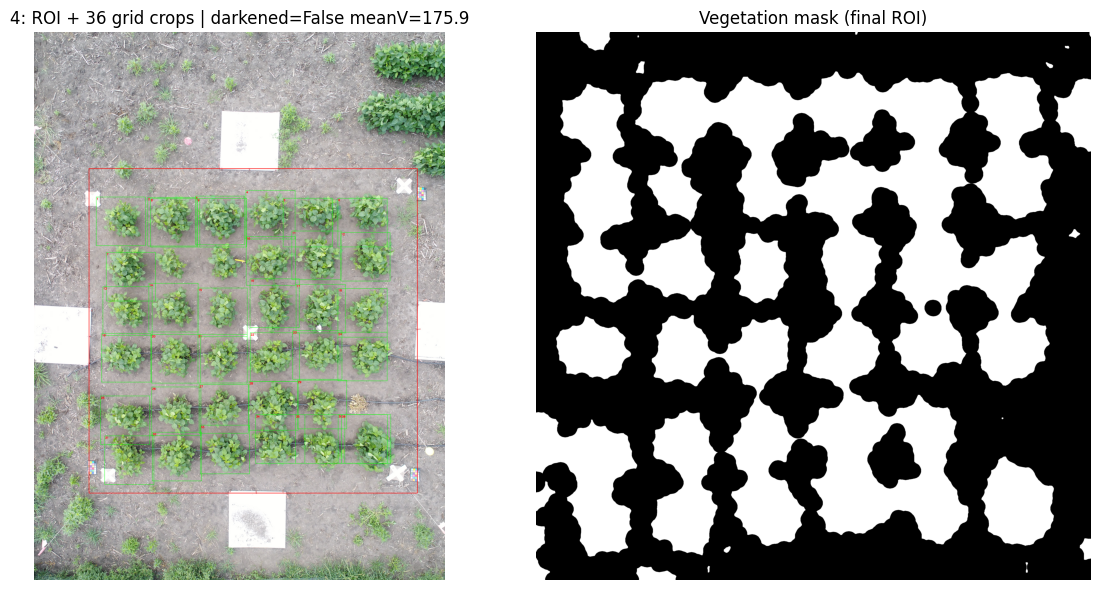

[4] coarseROI=(488, 1212, 3402, 4092) finalROI=(488, 1212, 3402, 4092)  crops -> /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_final_v4/4_crops
mean(V)=159.3
big boards: 4 coarse roi: (854, 1230, 3324, 3676)
refined ROI by veg bbox: (854, 1230, 3324, 3676)


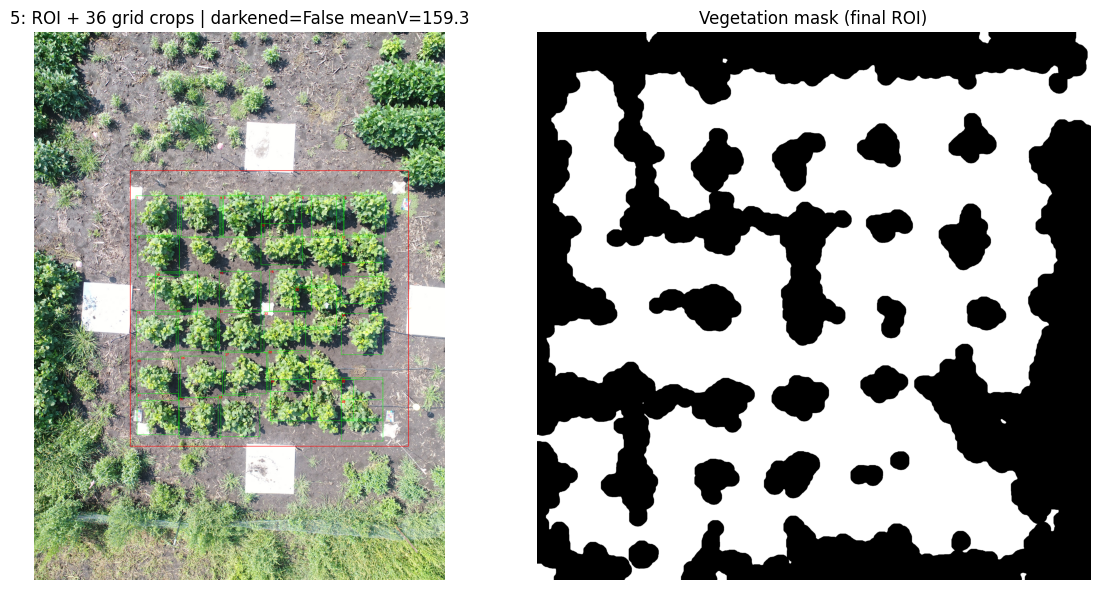

[5] coarseROI=(854, 1230, 3324, 3676) finalROI=(854, 1230, 3324, 3676)  crops -> /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_final_v4/5_crops
All outputs saved to: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_final_v4
Zipped to: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_final_v4.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# =========================
# HW1 3.2
# =========================

import os, zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt

# ----------------------------
# Paths
# ----------------------------
DATA_ROOT = "/content/ME5920/HW1/Agricultural_Image_Analytics"
OUT_DIR   = os.path.join(DATA_ROOT, "segmentation_out_final_v4")
os.makedirs(OUT_DIR, exist_ok=True)

IMG_PATHS = [os.path.join(DATA_ROOT, f"{i}.JPG") for i in range(1,6)]

# ----------------------------
# Hyperparams (you can tune)
# ----------------------------
BIG_BOARD_AREA_FRAC = 0.002      # big boards threshold vs image area
COARSE_MARGIN = 20               # margin from boards
COARSE_EXPAND_PX = 40            # expand coarse ROI outward to be safe

BRIGHT_V_MEAN_TH = 185           # if mean(V) > this => too bright, darken
DARKEN_GAMMA = 1.6               # >1 darkens
DARKEN_ALPHA = 0.90              # linear scale after gamma

VEG_BBOX_PAD_FRAC = 0.08         # pad vegetation bbox to form final ROI
VEG_MIN_PIXELS_FRAC = 0.001      # if vegetation pixels too few, skip bbox refine and use coarse ROI

GRID_N = 6                       # 6x6
CROP_SCALE = 0.90                # crop window = cell_size * this

# ============================================================
# 0) Brightness normalization (for image 2)
# ============================================================
def gamma_lut(gamma: float):
    inv = 1.0 / gamma
    table = np.array([((i/255.0) ** inv) * 255 for i in range(256)]).astype("uint8")
    return table

def auto_darken_if_needed(img_bgr, debug=False):
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    V = hsv[:,:,2]
    vmean = float(np.mean(V))

    if debug:
        print(f"mean(V)={vmean:.1f}")

    if vmean > BRIGHT_V_MEAN_TH:
        # gamma darken + alpha scale
        lut = gamma_lut(DARKEN_GAMMA)
        out = cv2.LUT(img_bgr, lut)
        out = np.clip(out.astype(np.float32)*DARKEN_ALPHA, 0, 255).astype(np.uint8)
        return out, True, vmean
    else:
        return img_bgr, False, vmean

# ============================================================
# 1) White mask + big boards -> coarse ROI
# ============================================================
def white_mask(img_bgr):
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    S = hsv[:,:,1]; V = hsv[:,:,2]
    m = ((V > 220) & (S < 90)).astype(np.uint8) * 255

    H,W = img_bgr.shape[:2]
    k = max(3, int(min(H,W)*0.008))
    ker = cv2.getStructuringElement(cv2.MORPH_RECT, (k,k))
    m = cv2.morphologyEx(m, cv2.MORPH_OPEN,  ker, iterations=1)
    m = cv2.morphologyEx(m, cv2.MORPH_CLOSE, ker, iterations=2)
    return m

def detect_components(mask):
    num, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    comps = []
    for i in range(1, num):
        x,y,w,h,area = stats[i]
        cx,cy = centroids[i]
        comps.append((x,y,w,h,area,cx,cy))
    comps = sorted(comps, key=lambda c: c[4], reverse=True)
    return comps

def coarse_roi_from_big_boards(img_bgr, debug=False):
    H,W = img_bgr.shape[:2]
    wm = white_mask(img_bgr)
    comps = detect_components(wm)

    big = []
    for c in comps:
        x,y,w,h,area,cx,cy = c
        ar = w/(h+1e-9)
        if area > BIG_BOARD_AREA_FRAC*H*W and 0.5 < ar < 2.0:
            big.append(c)
        if len(big) >= 8:
            break

    if len(big) < 4:
        # fallback: largest 4
        big = comps[:4]

    if len(big) == 0:
        # full fallback
        return (int(0.15*W), int(0.15*H), int(0.85*W), int(0.85*H)), wm, comps, big

    top    = min(big, key=lambda b: b[6])
    bottom = max(big, key=lambda b: b[6])
    left   = min(big, key=lambda b: b[5])
    right  = max(big, key=lambda b: b[5])

    margin = COARSE_MARGIN
    xL = int(left[0] + left[2] + margin)
    xR = int(right[0] - margin)
    yT = int(top[1] + top[3] + margin)
    yB = int(bottom[1] - margin)

    # expand a bit so we never cut plants (esp image 2)
    xL -= COARSE_EXPAND_PX; xR += COARSE_EXPAND_PX
    yT -= COARSE_EXPAND_PX; yB += COARSE_EXPAND_PX

    xL = max(0, min(W-1, xL)); xR = max(0, min(W, xR))
    yT = max(0, min(H-1, yT)); yB = max(0, min(H, yB))

    if debug:
        print("big boards:", len(big), "coarse roi:", (xL,yT,xR,yB))

    return (xL,yT,xR,yB), wm, comps, big

# ============================================================
# 2) Robust vegetation mask (ExG OR HSV green)
# ============================================================
def veg_mask_robust(img_bgr_roi):
    H,W = img_bgr_roi.shape[:2]

    b,g,r = cv2.split(img_bgr_roi.astype(np.float32))
    exg = 2*g - r - b
    exg = cv2.GaussianBlur(exg, (5,5), 0)
    exg_norm = cv2.normalize(exg, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    _, m_exg = cv2.threshold(exg_norm, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    hsv = cv2.cvtColor(img_bgr_roi, cv2.COLOR_BGR2HSV)
    lower = np.array([25, 20, 20])
    upper = np.array([95, 255, 255])
    m_hsv = cv2.inRange(hsv, lower, upper)

    m = cv2.bitwise_or(m_exg, m_hsv)

    # morphology
    k_open  = max(3, int(min(H,W)*0.003))
    k_close = max(7, int(min(H,W)*0.015))
    ker_o = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (k_open,k_open))
    ker_c = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (k_close,k_close))
    m = cv2.morphologyEx(m, cv2.MORPH_OPEN,  ker_o, iterations=1)
    m = cv2.morphologyEx(m, cv2.MORPH_CLOSE, ker_c, iterations=2)

    return m

# ============================================================
# 3) Refine ROI using vegetation bbox inside coarse ROI (GRID-friendly)
# ============================================================
def refine_roi_by_veg_bbox(coarse_roi, veg_mask_in_coarse, img_shape, debug=False):
    H,W = img_shape[:2]
    xL,yT,xR,yB = coarse_roi
    roiH, roiW = veg_mask_in_coarse.shape[:2]

    ys, xs = np.where(veg_mask_in_coarse > 0)
    if len(xs) < VEG_MIN_PIXELS_FRAC * roiH * roiW:
        if debug:
            print("veg pixels too few -> keep coarse ROI")
        return coarse_roi

    x1, x2 = xs.min(), xs.max()
    y1, y2 = ys.min(), ys.max()

    padx = int(VEG_BBOX_PAD_FRAC * (x2-x1+1))
    pady = int(VEG_BBOX_PAD_FRAC * (y2-y1+1))

    # bbox in coarse ROI coordinates -> global
    gx1 = np.clip(xL + x1 - padx, 0, W-1)
    gx2 = np.clip(xL + x2 + padx, 0, W)
    gy1 = np.clip(yT + y1 - pady, 0, H-1)
    gy2 = np.clip(yT + y2 + pady, 0, H)

    # also keep within coarse ROI (don’t extend beyond boards too far)
    gx1 = max(gx1, xL); gx2 = min(gx2, xR)
    gy1 = max(gy1, yT); gy2 = min(gy2, yB)

    if debug:
        print("refined ROI by veg bbox:", (int(gx1),int(gy1),int(gx2),int(gy2)))

    if gx2 <= gx1 or gy2 <= gy1:
        return coarse_roi

    return (int(gx1), int(gy1), int(gx2), int(gy2))

# ============================================================
# 4) 6x6 grid centers via distance transform (stronger than median pixel)
# ============================================================
def grid_centers_distance_transform(mask, n=6):
    H,W = mask.shape[:2]
    centers = []
    for r in range(n):
        for c in range(n):
            y1, y2 = int(r*H/n), int((r+1)*H/n)
            x1, x2 = int(c*W/n), int((c+1)*W/n)
            cell = mask[y1:y2, x1:x2]

            if np.count_nonzero(cell) == 0:
                cx = int((x1+x2)/2); cy = int((y1+y2)/2)
                centers.append((cx,cy))
                continue

            # distance transform peak -> most interior point of vegetation
            bin_cell = (cell > 0).astype(np.uint8)
            dist = cv2.distanceTransform(bin_cell, distanceType=cv2.DIST_L2, maskSize=5)
            cy_local, cx_local = np.unravel_index(np.argmax(dist), dist.shape)
            centers.append((x1 + int(cx_local), y1 + int(cy_local)))
    return centers  # row-major 36

# ============================================================
# 5) Crop + visualization
# ============================================================
def crop_by_centers(img_bgr, centers_global, win_w, win_h, crop_dir):
    H,W = img_bgr.shape[:2]
    os.makedirs(crop_dir, exist_ok=True)
    for k,(cx,cy) in enumerate(centers_global):
        cx,cy = int(cx), int(cy)
        x1 = max(0, cx - win_w//2)
        y1 = max(0, cy - win_h//2)
        x2 = min(W, x1 + win_w)
        y2 = min(H, y1 + win_h)
        x1 = max(0, x2 - win_w)
        y1 = max(0, y2 - win_h)
        crop = img_bgr[y1:y2, x1:x2]
        cv2.imwrite(os.path.join(crop_dir, f"{k+1:02d}.png"), crop)

def draw_vis(img_bgr, roi, centers_global, win_w, win_h):
    vis = img_bgr.copy()
    xL,yT,xR,yB = roi
    cv2.rectangle(vis, (xL,yT), (xR,yB), (0,0,255), 3)
    for k,(cx,cy) in enumerate(centers_global):
        x1 = int(cx - win_w/2)
        y1 = int(cy - win_h/2)
        cv2.rectangle(vis, (x1,y1), (x1+win_w, y1+win_h), (0,255,0), 2)
        cv2.putText(vis, str(k+1), (x1+3, y1+25),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2, cv2.LINE_AA)
    return vis

# ============================================================
# Main loop
# ============================================================
for idx, path in enumerate(IMG_PATHS, start=1):
    img0 = cv2.imread(path)
    if img0 is None:
        print("Skip unreadable:", path)
        continue

    # A) brightness normalize for detection (doesn't change coords)
    img_det, darkened, vmean = auto_darken_if_needed(img0, debug=True)

    # B) coarse ROI from big boards using detection image
    coarse_roi, wm, comps, big = coarse_roi_from_big_boards(img_det, debug=True)
    xL,yT,xR,yB = coarse_roi
    roi_det = img_det[yT:yB, xL:xR]

    # C) vegetation mask in coarse ROI
    veg_coarse = veg_mask_robust(roi_det)

    # D) refine ROI by vegetation bbox (grid-friendly, fixes 2 and stabilizes 4/5)
    final_roi = refine_roi_by_veg_bbox(coarse_roi, veg_coarse, img0.shape, debug=True)
    xL,yT,xR,yB = final_roi
    roi_det2 = img_det[yT:yB, xL:xR]

    # E) final vegetation mask in final ROI
    veg_final = veg_mask_robust(roi_det2)

    # F) grid centers via distance transform
    centers_roi = grid_centers_distance_transform(veg_final, n=GRID_N)
    centers_global = [(cx + xL, cy + yT) for (cx,cy) in centers_roi]

    # crop window size from final ROI cell size
    roiH, roiW = veg_final.shape[:2]
    win_w = int((roiW/GRID_N) * CROP_SCALE)
    win_h = int((roiH/GRID_N) * CROP_SCALE)

    # save crops + debug
    base = str(idx)
    crop_dir = os.path.join(OUT_DIR, f"{base}_crops")
    crop_by_centers(img0, centers_global, win_w, win_h, crop_dir)

    vis = draw_vis(img0, final_roi, centers_global, win_w, win_h)

    cv2.imwrite(os.path.join(OUT_DIR, f"{base}_boxed.png"), vis)
    cv2.imwrite(os.path.join(OUT_DIR, f"{base}_white_mask.png"), wm)
    cv2.imwrite(os.path.join(OUT_DIR, f"{base}_veg_mask_coarse.png"), veg_coarse)
    cv2.imwrite(os.path.join(OUT_DIR, f"{base}_veg_mask_final.png"), veg_final)

    # show preview
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    plt.title(f"{base}: ROI + 36 grid crops | darkened={darkened} meanV={vmean:.1f}")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(veg_final, cmap="gray")
    plt.title("Vegetation mask (final ROI)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    print(f"[{base}] coarseROI={coarse_roi} finalROI={final_roi}  crops -> {crop_dir}")

print("All outputs saved to:", OUT_DIR)

# ============================================================
# Zip + download
# ============================================================
zip_path = os.path.join(DATA_ROOT, "segmentation_out_final_v4.zip")
if os.path.exists(zip_path):
    os.remove(zip_path)

with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as z:
    for root, dirs, files in os.walk(OUT_DIR):
        for f in files:
            full = os.path.join(root, f)
            rel  = os.path.relpath(full, DATA_ROOT)
            z.write(full, rel)

print("Zipped to:", zip_path)

from google.colab import files
files.download(zip_path)


*   Basic Idea: Build a robust vegetation mask (ExG + HSV-green thresholding with morphology) and use it as the foundation for ROI selection and patch extraction.

*   Main Challenge:

  1.   Main challenge 1 (extra vegetation outside the plot): Besides the central 6×6 plants, there are surrounding plants/weeds. We first localize a coarse ROI using the four reflective boards, then refine it using the overall vegetation region (and small white corner markers when helpful) to restrict detection to the plot area.
  2. Main challenge 2 (Image 2 over-exposure): Image 2 is globally too bright, which breaks thresholding. We fix this by applying brightness adjustment / normalization (e.g., gamma darkening based on HSV V-channel statistics) before marker and vegetation detection.
  3. Main challenge 3 (Images 4–5 plant merging): Plants are larger and often touch, causing over-sized connected components where adjacent plants merge. We mitigate this by enforcing the known 6×6 grid prior: split the ROI into 36 cells and extract one plant-centered patch per cell (e.g., using distance-transform peaks), instead of relying purely on connected components.


*  Remaining issue: Images 4–5 still have cases where plants are not cleanly separated; fully resolving this would require stronger instance separation.
